<a href="https://colab.research.google.com/github/NguyenPhuongDng/Stock-Price-Prediction/blob/main/Stock_Forecasting_with_LSTMs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# dataset @ https://finance.yahoo.com/quote/MSFT/history/

# If you want the exact same dataset as the YouTube video,
# use this link: https://drive.google.com/file/d/1WLm1AEYgU28Nk4lY4zNkGPSctdImbhJI/view?usp=sharing

In [ ]:
import pandas as pd

df = pd.read_csv('tu_doanh.csv')

# df["Date"] = df['Ngày']
# df['Close'] = df['lich_su_gia_(Giá đóng cửa)']


In [ ]:
df['Close'] = df['GT bán']/df['KL bán'] * 1000
df['Date'] = df['Ngày']
# df = df[['Date', 'Close']]

df

,Unnamed: 0,Mã,Ngày,KL mua,GT mua,KL bán,GT bán,KL giao dịch ròng,GT giao dịch ròng,Close,Date
0,2,FPT,2025-04-29,195900,21.47,1929500,216.40,-1733600,-194.93,0.112153,2025-04-29
1,3,FPT,2025-04-28,52900,5.82,272000,30.11,-219100,-24.29,0.110699,2025-04-28
2,4,FPT,2025-04-25,1625400,183.42,242500,27.04,1382900,156.37,0.111505,2025-04-25
3,5,FPT,2025-04-24,235300,26.26,269400,30.09,-34100,-3.83,0.111693,2025-04-24
4,6,FPT,2025-04-23,667000,73.23,53100,5.86,613900,67.37,0.110358,2025-04-23
...,...,...,...,...,...,...,...,...,...,...,...
615,677,FPT,2022-11-07,41100,3.02,34000,2.48,7100,0.54,0.072941,2022-11-07
616,678,FPT,2022-11-04,84100,6.11,55900,4.10,28200,2.01,0.073345,2022-11-04
617,679,FPT,2022-11-03,48900,3.66,19500,1.45,29400,2.21,0.074359,2022-11-03
618,680,FPT,2022-11-02,76100,5.68,55200,4.13,20900,1.55,0.074819,2022-11-02


In [ ]:
df['Date']

,Date
0,2025-04-29
1,2025-04-28
2,2025-04-25
3,2025-04-24
4,2025-04-23
...,...
615,2022-11-07
616,2022-11-04
617,2022-11-03
618,2022-11-02


Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 81ms/step - loss: 0.2498 - val_loss: 0.0064
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - loss: 0.0167 - val_loss: 0.0094
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - loss: 0.0095 - val_loss: 0.0060
Epoch 4/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - loss: 0.0073 - val_loss: 0.0068
Epoch 5/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - loss: 0.0055 - val_loss: 0.0062
Epoch 6/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step - loss: 0.0054 - val_loss: 0.0061
Epoch 7/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - loss: 0.0064 - val_loss: 0.0067
Epoch 8/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - loss: 0.0049 - val_loss: 0.0060
Epoch 9/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - loss: 0.0051 - val_loss: 0.0058
Epoch 10/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - loss: 0.0046 - val_loss: 0.0059
Epoch 11/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - loss: 0.0047 - val_loss: 0.0057
Epoch 12/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 0.0

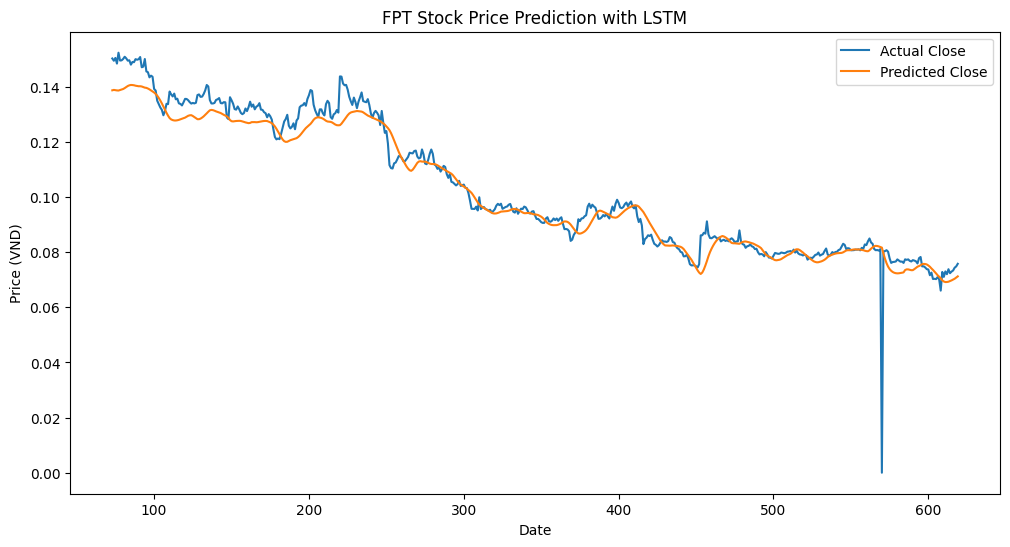

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# 1. Load FPT stock data (CSV with Date, Open, High, Low, Close, Volume)
# Replace 'FPT.csv' with your local data path
# df = pd.read_csv('tu_doanh.csv', parse_dates=['Date'], index_col='Date')

# 2. Compute Technical Indicators: SMA, EMA, MACD, RSI
def compute_technical_indicators(data):
    df = data.copy()
    # Simple Moving Average (SMA)
    df['SMA_14'] = df['Close'].rolling(window=14).mean()
    # Exponential Moving Average (EMA)
    df['EMA_14'] = df['Close'].ewm(span=14, adjust=False).mean()
    # MACD
    ema12 = df['Close'].ewm(span=12, adjust=False).mean()
    ema26 = df['Close'].ewm(span=26, adjust=False).mean()
    df['MACD'] = ema12 - ema26
    df['MACD_signal'] = df['MACD'].ewm(span=9, adjust=False).mean()
    # RSI
    delta = df['Close'].diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    avg_gain = gain.rolling(window=14).mean()
    avg_loss = loss.rolling(window=14).mean()
    rs = avg_gain / avg_loss
    df['RSI_14'] = 100 - (100 / (1 + rs))
    # Drop NaN
    df = df.dropna()
    return df

df_ti = compute_technical_indicators(df)

# 3. Prepare data for LSTM: use past 60 days to predict next close price
def create_dataset(data, feature_cols, target_col, window_size=60):
    X, y = [], []
    for i in range(window_size, len(data)):
        X.append(data[feature_cols].iloc[i-window_size:i].values)
        y.append(data[target_col].iloc[i])
    return np.array(X), np.array(y)

# Select features and target
features = ['Close', 'SMA_14', 'EMA_14', 'MACD', 'MACD_signal', 'RSI_14']
target = 'Close'

# Scale features
dates = df_ti.index
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_ti[features]),
                         index=dates, columns=features)

# Create sequences
window_size = 60
X, y = create_dataset(df_scaled, features, target, window_size)

# Convert train_end, test_start, and test_end to NumPy datetime64 objects
train_end_dt = pd.Timestamp('2024-05-01').to_numpy()
test_start_dt = pd.Timestamp('2024-05-06').to_numpy()
test_end_dt = pd.Timestamp('2025-04-29').to_numpy()

# Now you can compare the dates array
dates = df_ti.index[window_size:].to_numpy().astype('datetime64[ns]') # Convert dates to datetime64[ns]
train_mask = (dates <= train_end_dt)
test_mask = (dates >= test_start_dt) & (dates <= test_end_dt)
X_train, y_train = X[train_mask], y[train_mask]
X_test, y_test = X[test_mask], y[test_mask]

# 4. Build the LSTM model
model = Sequential([
    LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    LSTM(units=50, return_sequences=False),
    Dropout(0.2),
    Dense(units=25, activation='relu'),
    Dense(units=1)
])
model.compile(optimizer='adam', loss='mean_squared_error')

# 5. Train model with EarlyStopping
es = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(
    X_train, y_train,
    validation_split=0.1,
    epochs=100,
    batch_size=32,
    callbacks=[es],
    verbose=1
)

# 6. Predict and invert scaling
y_pred = model.predict(X_train)

# To invert scaling on predictions, we need to scale only the 'Close' column back
y_test_unscaled = scaler.inverse_transform(
    np.concatenate([y_train.reshape(-1,1)] + [np.zeros((len(y_train), len(features)-1))], axis=1)
)[:,0]
y_pred_unscaled = scaler.inverse_transform(
    np.concatenate([y_pred] + [np.zeros((len(y_pred), len(features)-1))], axis=1)
)[:,0]

# 7. Evaluate performance
rmse = np.sqrt(mean_squared_error(y_test_unscaled, y_pred_unscaled))
print(f"Test RMSE: {rmse:.2f}")

# 8. Plot results
plt.figure(figsize=(12,6))
plt.plot(df_ti.index[-len(y_test_unscaled):], y_test_unscaled, label='Actual Close')
plt.plot(df_ti.index[-len(y_pred_unscaled):], y_pred_unscaled, label='Predicted Close')
plt.title('FPT Stock Price Prediction with LSTM')
plt.xlabel('Date')
plt.ylabel('Price (VND)')
plt.legend()
plt.show()


In [ ]:
import datetime

def str_to_datetime(s):
  split = s.split('-')
  year, month, day = int(split[0]), int(split[1]), int(split[2])
  return datetime.datetime(year=year, month=month, day=day)

datetime_object = str_to_datetime('1986-03-19')
datetime_object

datetime.datetime(1986, 3, 19, 0, 0)

In [ ]:
df

,Date,Close
0,2006-12-13,400.0
1,2006-12-14,420.0
2,2006-12-15,441.0
3,2006-12-18,463.0
4,2006-12-19,486.0
...,...,...
4575,2025-04-23,110.4
4576,2025-04-24,112.0
4577,2025-04-25,112.4
4578,2025-04-28,109.5


In [ ]:
df['Date'] = df['Date'].apply(str_to_datetime)
df['Date']

,Date
0,2006-12-13
1,2006-12-14
2,2006-12-15
3,2006-12-18
4,2006-12-19
...,...
4575,2025-04-23
4576,2025-04-24
4577,2025-04-25
4578,2025-04-28


In [ ]:
df.index = df.pop('Date')
df

,Close
Date,
2006-12-13,400.0
2006-12-14,420.0
2006-12-15,441.0
2006-12-18,463.0
2006-12-19,486.0
...,...
2025-04-23,110.4
2025-04-24,112.0
2025-04-25,112.4


In [ ]:
nan_counts = df.isna().sum()
print(nan_counts)
df = df.dropna()


Close    2
dtype: int64


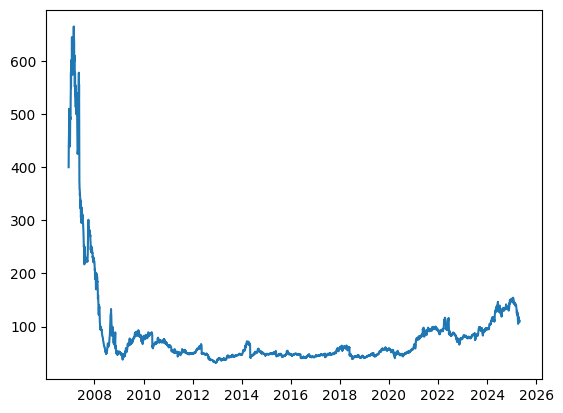

In [ ]:
import matplotlib.pyplot as plt

plt.plot(df.index, df['Close'])

In [ ]:
print(type(df.index))
df.index

<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


DatetimeIndex(['2006-12-13', '2006-12-14', '2006-12-15', '2006-12-18',
               '2006-12-19', '2006-12-20', '2006-12-21', '2006-12-22',
               '2006-12-25', '2006-12-26',
               ...
               '2025-04-16', '2025-04-17', '2025-04-18', '2025-04-21',
               '2025-04-22', '2025-04-23', '2025-04-24', '2025-04-25',
               '2025-04-28', '2025-04-29'],
              dtype='datetime64[ns]', name='Date', length=4578, freq=None)

In [ ]:
df = df.sort_index()

print(df.index.is_monotonic_increasing)


True


In [ ]:
import numpy as np

def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
  first_date = str_to_datetime(first_date_str)
  last_date  = str_to_datetime(last_date_str)

  target_date = first_date

  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)

    if len(df_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = df_subset['Close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]


    if len(next_week) < 2:
        print(f'Warning: No data available from {target_date} to {target_date + datetime.timedelta(days=7)}')
        target_date += datetime.timedelta(days=1)  # Chuyển sang ngày tiếp theo nếu không có dữ liệu
        if target_date > last_date:
            break
        continue  # Tiếp tục vòng lặp

    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))

    if next_date == target_date:
      last_time = True

    if last_time:
      break

    target_date = next_date
    if target_date == last_date:
      last_time = True

  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates

  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]

  ret_df['Target'] = Y

  return ret_df

# Start day second time around: '2021-03-25'
windowed_df = df_to_windowed_df(df,
                                '2007-04-29',
                                '2025-04-29',
                                n=60)
windowed_df

,Target Date,Target-60,Target-59,Target-58,Target-57,Target-56,Target-55,Target-54,Target-53,Target-52,...,Target-9,Target-8,Target-7,Target-6,Target-5,Target-4,Target-3,Target-2,Target-1,Target
0,2007-04-29,602.0,580.0,580.0,580.0,605.0,635.0,645.0,620.0,630.0,...,540.0,520.0,525.0,515.0,520.0,505.0,480.0,456.0,434.0,425.0
1,2007-05-03,580.0,580.0,605.0,635.0,645.0,620.0,630.0,599.0,625.0,...,525.0,515.0,520.0,505.0,480.0,456.0,434.0,425.0,433.0,442.0
2,2007-05-04,580.0,605.0,635.0,645.0,620.0,630.0,599.0,625.0,635.0,...,515.0,520.0,505.0,480.0,456.0,434.0,425.0,433.0,442.0,464.0
3,2007-05-07,605.0,635.0,645.0,620.0,630.0,599.0,625.0,635.0,604.0,...,520.0,505.0,480.0,456.0,434.0,425.0,433.0,442.0,464.0,487.0
4,2007-05-08,635.0,645.0,620.0,630.0,599.0,625.0,635.0,604.0,574.0,...,505.0,480.0,456.0,434.0,425.0,433.0,442.0,464.0,487.0,500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4532,2025-04-23,150.0,149.9,149.7,154.3,153.4,146.2,146.3,146.5,146.1,...,112.6,118.5,118.5,116.0,107.9,109.4,111.6,111.7,110.4,110.4
4533,2025-04-24,149.9,149.7,154.3,153.4,146.2,146.3,146.5,146.1,142.0,...,118.5,118.5,116.0,107.9,109.4,111.6,111.7,110.4,110.4,112.0
4534,2025-04-25,149.7,154.3,153.4,146.2,146.3,146.5,146.1,142.0,145.4,...,118.5,116.0,107.9,109.4,111.6,111.7,110.4,110.4,112.0,112.4
4535,2025-04-28,154.3,153.4,146.2,146.3,146.5,146.1,142.0,145.4,145.0,...,116.0,107.9,109.4,111.6,111.7,110.4,110.4,112.0,112.4,109.5


In [ ]:
def windowed_df_to_date_X_y(windowed_dataframe):
  df_as_np = windowed_dataframe.to_numpy()

  dates = df_as_np[:, 0]

  middle_matrix = df_as_np[:, 1:-1]
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  Y = df_as_np[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((4537,), (4537, 60, 1), (4537,))

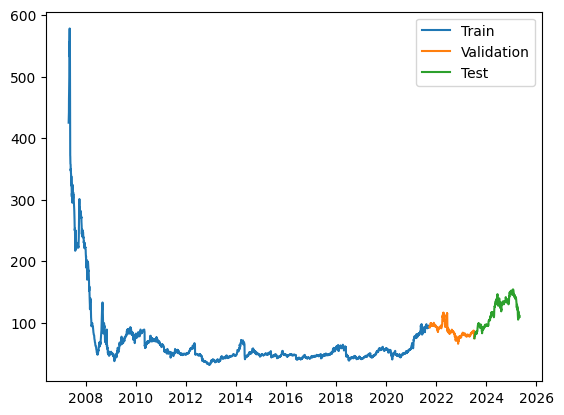

In [ ]:
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint_cb = ModelCheckpoint(
    'best_model.h5',                # tên file để lưu
    monitor='val_loss',             # theo dõi metric nào ('val_loss' hoặc 'val_mean_absolute_error')
    save_best_only=True,            # chỉ lưu khi tốt hơn model trước
    mode='min',                     # vì val_loss nhỏ hơn là tốt hơn
    verbose=1                       # in ra log khi lưu
)



In [ ]:
# Định nghĩa mô hình
model = Sequential([layers.Input((60, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

# Biên dịch mô hình
model.compile(loss='mse',
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

# Huấn luyện mô hình với callback
model.fit(X_train, y_train,
          validation_data=(X_val, y_val),
          epochs=100,
          batch_size=32,  # Thêm batch_size để tối ưu hóa (tùy chọn)
          callbacks=[checkpoint_cb])  # Thêm callback vào đây

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

model = Sequential([layers.Input((60, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse',
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)

Epoch 1/100
114/114 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 6554.9902 - mean_absolute_error: 59.2606 - val_loss: 507.1991 - val_mean_absolute_error: 20.1437
Epoch 2/100
114/114 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 3281.5229 - mean_absolute_error: 26.1247 - val_loss: 6.9840 - val_mean_absolute_error: 1.9704
Epoch 3/100
114/114 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 415.9368 - mean_absolute_error: 4.5152 - val_loss: 5.9833 - val_mean_absolute_error: 1.5414
Epoch 4/100
114/114 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 141.9304 - mean_absolute_error: 2.5110 - val_loss: 4.6975 - val_mean_absolute_error: 1.4251
Epoch 5/100
114/114 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 62.5536 - mean_absolute_error: 1.8506 - val_loss: 5.8056 - val_mean_absolute_error: 1.6034
Epoch 6/100
114/114 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 29.7936 - mean_absolute_error: 2.5102 - val_loss: 5.6003 - val_mean_absolute_error: 1.6771
Epoch 7/100
114/114 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 33.9489 -

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

# Định nghĩa mô hình
model = Sequential([layers.Input((5, 1)),  # Cập nhật kích thước cửa sổ thành 5
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

# Biên dịch mô hình
model.compile(loss='mse',
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

# Số epoch và các tham số
epochs = 100
w = 5  # Kích thước cửa sổ
num_samples = len(X_train)

# Kiểm tra hình dạng dữ liệu đầu vào
if X_train.shape[1] != w:
    raise ValueError(f"Kích thước cửa sổ (w={w}) không khớp với X_train.shape[1]={X_train.shape[1]}. Hãy đảm bảo X_train có hình dạng (num_samples, {w}, 1)")

# Vòng lặp qua từng epoch
for epoch in range(epochs):
    print(f"Epoch {epoch + 1}/{epochs}")

    # Tạo tập dữ liệu động với vectorization
    X_train_dynamic = X_train.copy()  # Sao chép toàn bộ X_train

    # Dự đoán toàn bộ X_train cùng lúc
    preds = model.predict(X_train, batch_size=32, verbose=0)  # Dự đoán theo batch

    # Tạo mảng ngẫu nhiên để quyết định 50-50
    mask = np.random.random(num_samples) < 0.5  # True cho 50% dùng dự đoán, False cho 50% dùng giá trị thực

    # Cập nhật cửa sổ cho tất cả mẫu cùng lúc
    for i in range(num_samples):
        current_window = X_train_dynamic[i].copy()
        true_value = y_train[i]

        # Chọn next_value dựa trên mask
        next_value = preds[i, 0] if mask[i] else true_value

        # Cập nhật cửa sổ
        updated_window = np.roll(current_window, -1, axis=0)
        updated_window[-1] = next_value

        X_train_dynamic[i] = updated_window

    # Tạo y_train_dynamic
    y_train_dynamic = y_train.copy()

    # Huấn luyện với model.fit trong 1 epoch
    history = model.fit(X_train_dynamic, y_train_dynamic,
                        validation_data=(X_val, y_val),
                        epochs=1,  # Chỉ 1 epoch, vì vòng lặp bên ngoài đã quản lý
                        batch_size=32,
                        verbose=0)

    # In kết quả
    train_loss = history.history['loss'][0]
    train_mae = history.history['mean_absolute_error'][0]
    val_loss = history.history['val_loss'][0]
    val_mae = history.history['val_mean_absolute_error'][0]
    print(f"Train Loss: {train_loss:.4f}, Train MAE: {train_mae:.4f}, Val Loss: {val_loss:.4f}, Val MAE: {val_mae:.4f}")

Epoch 1/100
Train Loss: 5306.7280, Train MAE: 46.8395, Val Loss: 712.0284, Val MAE: 24.6947
Epoch 2/100
Train Loss: 2581.1416, Train MAE: 22.5372, Val Loss: 8.9227, Val MAE: 1.8193
Epoch 3/100
Train Loss: 573.1812, Train MAE: 5.8753, Val Loss: 24.8262, Val MAE: 3.5472
Epoch 4/100
Train Loss: 148.3523, Train MAE: 2.8561, Val Loss: 7.2875, Val MAE: 1.8329
Epoch 5/100
Train Loss: 93.3150, Train MAE: 2.1558, Val Loss: 12.4178, Val MAE: 2.4306
Epoch 6/100
Train Loss: 72.1065, Train MAE: 2.2391, Val Loss: 6.2047, Val MAE: 1.4188
Epoch 7/100
Train Loss: 48.9815, Train MAE: 1.7118, Val Loss: 5.0751, Val MAE: 1.2821
Epoch 8/100
Train Loss: 71.0748, Train MAE: 1.9085, Val Loss: 6.3675, Val MAE: 1.5967
Epoch 9/100
Train Loss: 61.0540, Train MAE: 1.9237, Val Loss: 4.9103, Val MAE: 1.2701
Epoch 10/100
Train Loss: 35.4958, Train MAE: 1.4750, Val Loss: 5.6958, Val MAE: 1.5346
Epoch 11/100
Train Loss: 31.3769, Train MAE: 1.4760, Val Loss: 7.1069, Val MAE: 1.9121
Epoch 12/100
Train Loss: 30.3197, Train

In [ ]:
from tensorflow.keras.models import load_model

best_model = load_model('best_model.h5')

114/114 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step


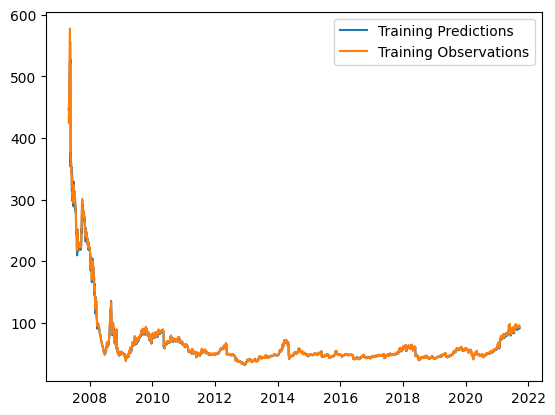

In [ ]:
train_predictions = model.predict(X_train).flatten()

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


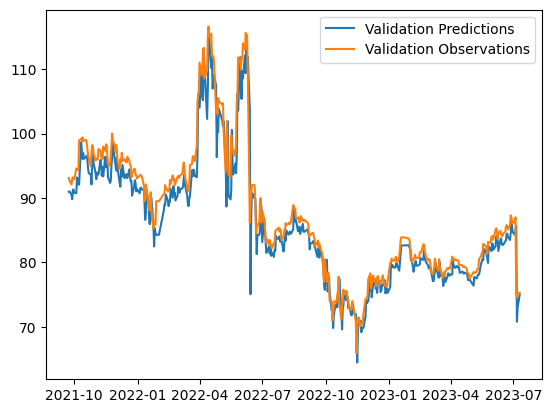

In [ ]:
val_predictions = model.predict(X_val).flatten()

plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


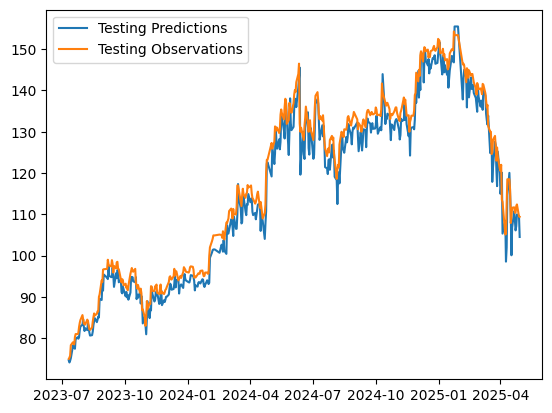

In [ ]:
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

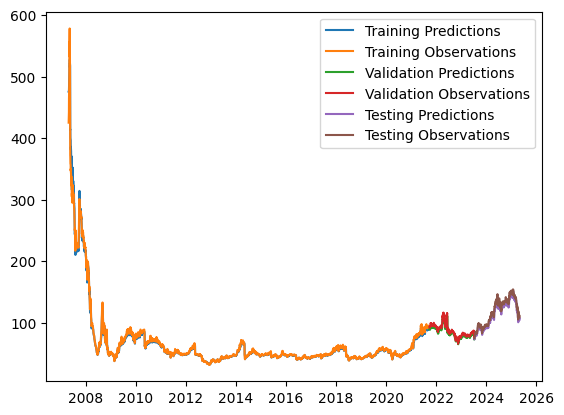

In [ ]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Testing Predictions',
            'Testing Observations'])

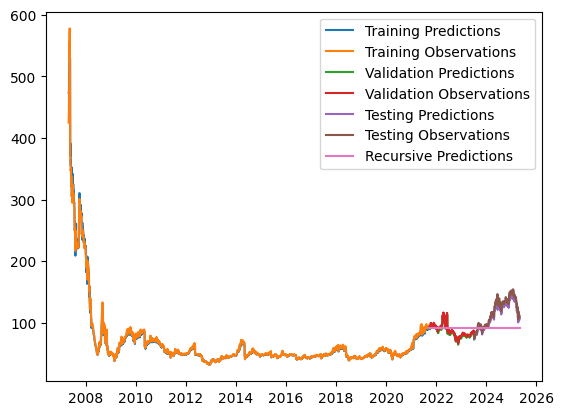

In [ ]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.plot(recursive_dates, recursive_predictions)
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Testing Predictions',
            'Testing Observations',
            'Recursive Predictions'])

In [ ]:
print(X_test[-1])

[[112. ]
 [112.4]
 [109.5]]


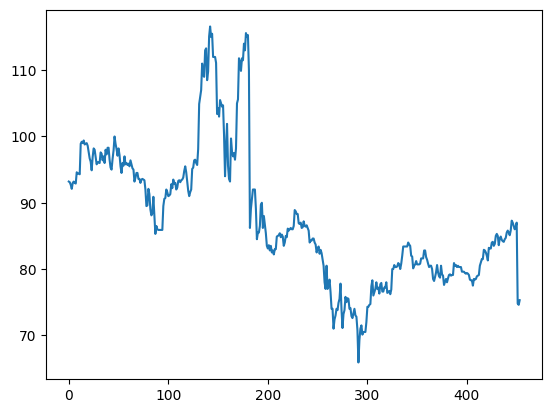

In [ ]:
visual = []
for i in range(len(X_val)):
   visual.append(X_val[i][-1][0])
plt.plot(visual)

Streaming output truncated to the last 5000 lines.
 [93.7     ]
 [93.2     ]
 [92.      ]
 [93.4     ]
 [94.      ]
 [95.6     ]
 [95.8     ]
 [95.6     ]
 [96.6     ]
 [96.6     ]
 [97.5     ]
 [97.8     ]
 [96.1     ]
 [93.8     ]
 [95.      ]
 [94.6     ]
 [93.8     ]
 [94.      ]
 [94.5     ]
 [92.8     ]
 [91.      ]
 [91.9     ]
 [91.9     ]
 [91.4     ]
 [92.      ]
 [92.2     ]
 [92.4     ]
 [92.4     ]
 [94.9     ]
 [93.5     ]
 [93.1     ]
 [93.2     ]
 [93.5     ]
 [93.      ]
 [93.8     ]
 [94.1     ]
 [94.7     ]
 [95.7     ]
 [94.4     ]
 [93.5     ]
 [90.821175]
 [87.812996]
 [84.87295 ]
 [82.33613 ]
 [80.232216]
 [78.4811  ]
 [76.99166 ]
 [75.69193 ]
 [74.53076 ]
 [73.47235 ]
 [72.49104 ]
 [71.567726]
 [70.68762 ]
 [69.83889 ]
 [69.011696]
 [68.19764 ]
 [67.389305]
 [66.57998 ]
 [65.76339 ]]
next prediction [64.9428]
[[93.7     ]
 [93.2     ]
 [92.      ]
 [93.4     ]
 [94.      ]
 [95.6     ]
 [95.8     ]
 [95.6     ]
 [96.6     ]
 [96.6     ]
 [97.5     ]
 [97.8     ]

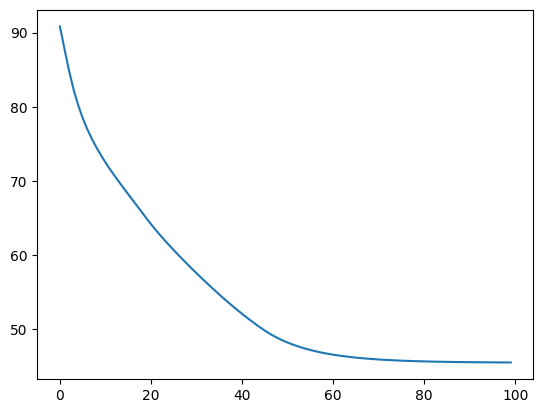

In [ ]:
from copy import deepcopy

result = []
last_window = deepcopy(X_train[-1])
for i in range(100):
  next_prediction = model.predict(np.array([last_window]), verbose=0).flatten()
  print("next prediction", next_prediction)
  result.append(next_prediction[0])

  # Cập nhật last_window bằng cách dịch trái và thêm giá trị mới vào cuối
  last_window[:-1] = last_window[1:]
  last_window[-1] = next_prediction
  print(last_window)
plt.plot(result)
  # recursive_predictions.append(next_prediction)
  # last_window[-1] = next_prediction